# Upper Confidence Bound (UCB)

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Importing the dataset

In [20]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [21]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

for n in range (0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if numbers_of_selections[i] > 0:
      average_reward = sums_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
       upper_bound = 1e400
    if(upper_bound>max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n,ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

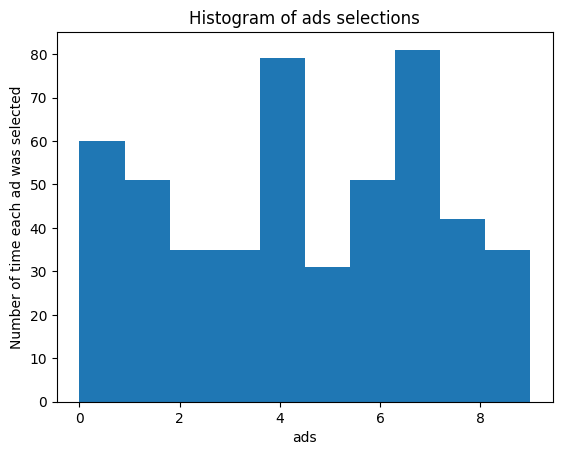

In [22]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('ads')
plt.ylabel('Number of time each ad was selected')
plt.show()